# EDA

In [1]:
# load pandas for data analysis
import pandas as pd

# load dataset
parking_violations = pd.read_csv('../data/sample/Parking_Violations_Issued_in_August_2018.csv')

In [2]:
# head of dataset
parking_violations.head()

,OBJECTID,ISSUE_DATE,ISSUE_TIME,ISSUING_AGENCY_CODE,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,VIOLATION_PROC_DESC,LOCATION,PLATE_STATE,...,PENALTY_2,PENALTY_3,PENALTY_4,PENALTY_5,XCOORD,YCOORD,LATITUDE,LONGITUDE,MAR_ID,GIS_LAST_MOD_DTTM
0,290490,2018/08/24 04:00:00+00,01:44 AM,7.0,METROPOLITAN POLICE DPT-DISTRICT 7,MPD-7D,P344,VEHICLE ON PRIVATE/PUBLIC PROPERTY WITHOUT CON...,4205 4TH ST SE,,...,NaN,1.0,NaN,NaN,399920.0,129047.0,38.829,-77.001,147401.0,2019/05/29 04:16:08+00
1,290491,2018/08/24 04:00:00+00,01:46 PM,7.0,METROPOLITAN POLICE DPT-DISTRICT 7,MPD-7D,P344,VEHICLE ON PRIVATE/PUBLIC PROPERTY WITHOUT CON...,4205 4TH ST SE,,...,NaN,NaN,NaN,NaN,399920.0,129047.0,38.829,-77.001,147401.0,2019/05/29 04:16:08+00
2,290492,2018/08/24 04:00:00+00,02:20 AM,7.0,METROPOLITAN POLICE DPT-DISTRICT 7,MPD-7D,P344,VEHICLE ON PRIVATE/PUBLIC PROPERTY WITHOUT CON...,4329 4TH ST SE,,...,NaN,1.0,NaN,NaN,399867.0,128923.0,38.828,-77.002,147406.0,2019/05/29 04:16:08+00
3,290493,2018/08/24 04:00:00+00,02:25 AM,7.0,METROPOLITAN POLICE DPT-DISTRICT 7,MPD-7D,P344,VEHICLE ON PRIVATE/PUBLIC PROPERTY WITHOUT CON...,4221 4TH ST SE,,...,NaN,1.0,NaN,NaN,399923.0,128963.0,38.828,-77.001,147405.0,2019/05/29 04:16:08+00
4,290494,2018/08/24 04:00:00+00,03:20 AM,7.0,METROPOLITAN POLICE DPT-DISTRICT 7,MPD-7D,P344,VEHICLE ON PRIVATE/PUBLIC PROPERTY WITHOUT CON...,4337 4TH ST SE,,...,NaN,NaN,NaN,NaN,399860.0,128878.0,38.828,-77.002,147392.0,2019/05/29 04:16:08+00


In [3]:
# dataset info
parking_violations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136522 entries, 0 to 136521
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   OBJECTID              136522 non-null  int64  
 1   ISSUE_DATE            136522 non-null  object 
 2   ISSUE_TIME            136436 non-null  object 
 3   ISSUING_AGENCY_CODE   136498 non-null  float64
 4   ISSUING_AGENCY_NAME   136498 non-null  object 
 5   ISSUING_AGENCY_SHORT  136498 non-null  object 
 6   VIOLATION_CODE        136522 non-null  object 
 7   VIOLATION_PROC_DESC   131860 non-null  object 
 8   LOCATION              136505 non-null  object 
 9   PLATE_STATE           136522 non-null  object 
 10  VEHICLE_TYPE          0 non-null       float64
 11  MULTI_OWNER_NUMBER    6660 non-null    float64
 12  DISPOSITION_CODE      57444 non-null   float64
 13  DISPOSITION_TYPE      136522 non-null  object 
 14  DISPOSITION_DESC      57444 non-null   object 
 15  

## Observations

Null fields:
* VEHICLE_TYPE
* PENALTY_1
* PENALTY_2
* PENALTY_3
* PENALTY_4
* PENALTY_5

Disposition fields - determine significance of DISPOSITION_CODE, DISPOSITION_TYPE, DISPOSITION_DESC, DISPOSITION_DATE
    
Date fields that require additional review:
* ISSUE_DATE - format
* GIS_LAST_MOD_DTTM - format, determine unique values and overall relevance

In [4]:
# get values for disposition fields
parking_violations['DISPOSITION_DESC'].unique()

array(['DEEMED LIABLE', nan, 'RECONSIDER DENIED', 'DISM NOI LATE HEARG',
       'DISM NOI SUBM LATE', 'DISMISSED NO CASE', 'LIABLE',
       'DISM MAKE MISMATCH', 'DISMISSED ON MERIT', 'DISM STOLEN RPT PROV',
       'LIABLE PENALTY DISM', 'LIABLE FINE REDUCED', 'DISM NO VIOL CODE',
       'DISM NO SIDE OF STR', 'DISM NO QUADRANT', 'DISM ILLEGIBLE DATA',
       'RECONSIDER GRANTED', 'DISM NO LICNSE STATE', 'CONTINUED',
       'CCU SETTLEMENT', 'DISM DATA ENTRY ERR', 'VOID REQUEST BY DPW',
       'PARK MOBILE RECEIPT', 'LIABLE METER OUTAGE',
       'DISM ROSA EXEMPTION', 'REMOVE PENALTY 1&2', 'DISM NO VEHCL MAKE',
       'CONTINUE ROSA', 'EVIDENCE PER CODE', 'RECONDENY PENDISMIS',
       'LIABLE FL TO PAY MET', 'APPEAL BACKOUT', 'DISM METER OUTAGE',
       'APL CANCEL FILING', 'DISM WRONG LOCATION', 'DISM OFFICL GOVT BUS',
       'LIAB DEFAULT DENIED', 'APPEAL REVERSE NOI', 'VOID REQUEST BY MPD',
       'ADMINISTRATIVE DISM', 'APPEAL AFFIRM NOI', 'CCU MORCA SETTLEMENT',
       'DISM INCOR

In [6]:
parking_violations['MULTI_OWNER_NUMBER'].unique()

array([           nan, 9.50368779e+08, 2.07110000e+07, ...,
       9.50152495e+08, 9.50361956e+08, 9.50334466e+08])

In [7]:
parking_violations['GIS_LAST_MOD_DTTM'].unique()

array(['2019/05/29 04:16:08+00'], dtype=object)

In [8]:
parking_violations['PLATE_STATE'].unique()

array([' ', 'VA', 'MD'], dtype=object)

In [9]:
parking_violations['VIOLATION_CODE'].unique()

array(['P344', 'P014', 'P269', 'P170', 'P259', 'P039', 'P002', 'P036',
       'P007', 'P302', 'P304', 'P050', 'P055', 'P360', 'P041', 'P012',
       'P288', 'P159', 'P046', 'P059', 'P429', 'P013', 'P011', 'P031',
       'P045', 'P365', 'P428', 'P047', 'P001', 'P057', 'P332', 'P020',
       'P015', 'P303', 'NO VIOL', 'P316', 'P318', 'P029', 'P025', 'P024',
       'P168', 'P198', 'P334', 'P322', 'P034', 'P005', 'P017', 'P270',
       'P023', 'P004', 'P042', 'P346', 'P056', 'P003', 'P417', 'P206',
       'P386', 'P173', 'P113', 'P076', 'P172', 'P035', 'P037', 'P112',
       'P281', 'P199', 'P285', 'P307', 'P280', 'P430', 'P216', 'P010',
       'P287', 'P385', 'P022', 'P271', 'P320', 'P282', 'P278', 'P043',
       'P054', 'P111', 'P306', 'P314', 'P418', 'P032', 'P077', 'P431',
       'P040', 'P419', 'P403', 'P432', 'P312', 'P026', 'P169', 'P239',
       'P072', 'P058', 'P019', 'P410', 'P038', 'P213', 'P319', 'P310',
       'P016', 'P284', 'P413', 'P093', 'P309', 'P301', 'P363', 'P371',
   

In [10]:
parking_violations['FINE_AMOUNT'].unique()

array([ 250.,   nan,   50.,  100.,   25.,   30.,  150.,   20.,   60.,
        500.,   75.,   35.,   45.,   65., 1000.,   15.,   10.,    5.,
        200.])

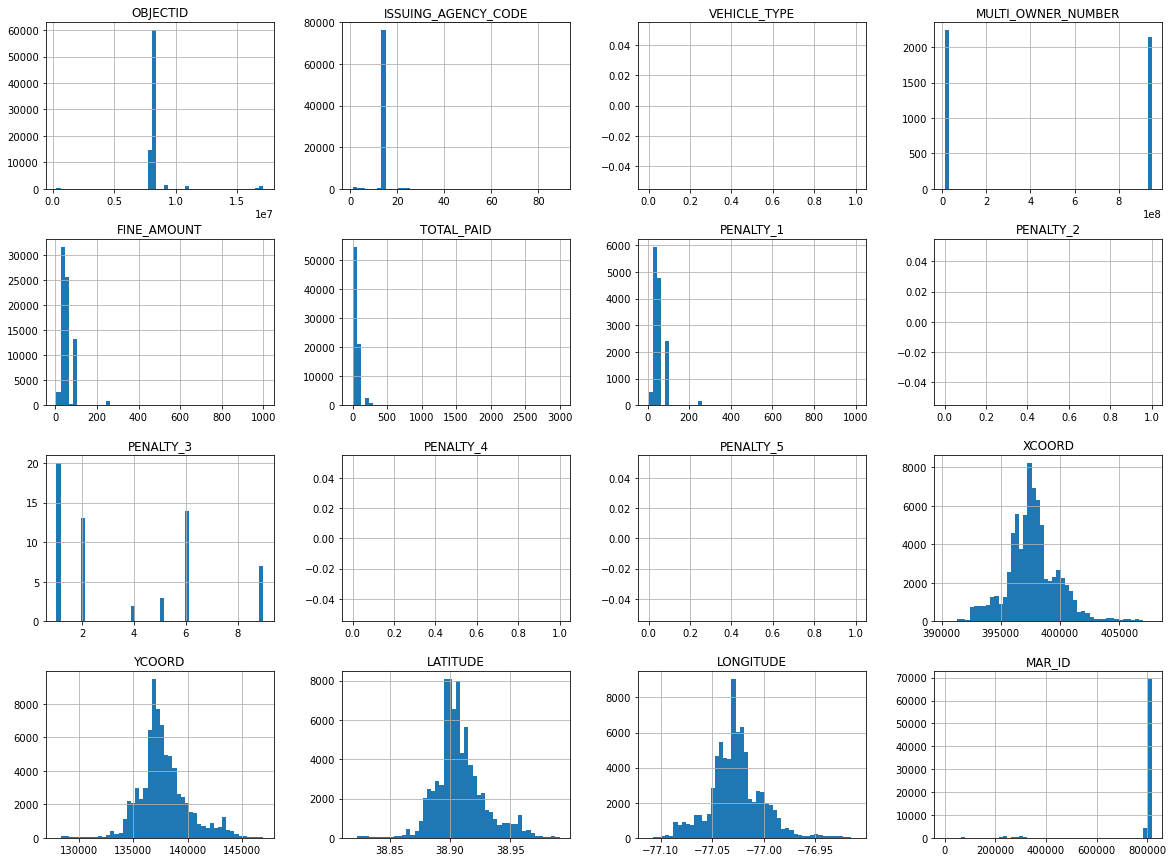

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline 
parking_violations.hist(bins=50, figsize=(20,15)) 
plt.show()

<AxesSubplot:ylabel='Frequency'>

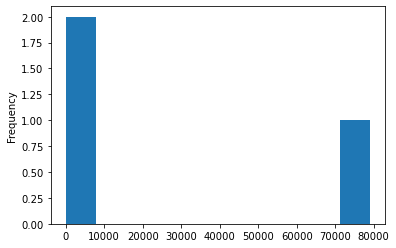

In [12]:
parking_violations['PLATE_STATE'].value_counts().plot.hist()